# ACS2 vs ACS2ER in Multiplexer

In [1]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import gym
import gym_multiplexer
from gym_multiplexer.utils import get_correct_answer
from lcs import Perception

from lcs.agents.acs2 import ACS2, Configuration as CFG_ACS2
from lcs.agents.acs2er import ACS2ER, Configuration as CFG_ACS2ER


# EXPERIMENT CONFIGURATION

In [2]:
RUN = 3

EXPERIMENTS = 25

BITS = 11 # 6 | 11 | 20

EXPLORE_TRIALS = 500
EXPLOIT_TRIALS = 100

# The size of ER replay memory buffer
ER_BUFFER_SIZE=250
# The minimum number of samples of ER replay memory buffer to start replying samples (warm-up phase)
ER_BUFFER_MIN_SAMPLES=25
# The number of samples to be replayed druing ER phase
ER_SAMPLES_NUMBER=3

## Metrics and helpers

In [3]:
def reliable_cl_exists(env, population, ctrl_bits=None) -> bool:
    p1 = env.render('ansi')  # state after executing action
    p1 = [str(x) for x in p1]  # cast to strings
    p0 = p1[:-1] + ['0']  # initial state
    correct_answer = get_correct_answer(p0, ctrl_bits)  # true action

    reliable_classifiers = [c for c in population if c.is_reliable()]

    return any([1 for cl in reliable_classifiers if
                cl.predicts_successfully(
                    Perception(p0),
                    correct_answer,
                    Perception(p1))])

def mpx_metrics(agent, env):
    return {
        'population': len(agent.population),
        'reliable_cl_exists': reliable_cl_exists(env, agent.population, ctrl_bits=2)
    }

def get_avg_reward(metrics):
    return np.mean(list(map(lambda m: m['reward'], metrics)))


class MpxObservationWrapper(gym.ObservationWrapper):
    def observation(self, observation):
        return [str(x) for x in observation]

### Results arrays

In [4]:
acs2_explore_results = np.zeros(EXPERIMENTS)
acs2_exploit_results = np.zeros(EXPERIMENTS)
acs2er_explore_results = np.zeros(EXPERIMENTS)
acs2er_exploit_results = np.zeros(EXPERIMENTS)

ACS2 Experiments

In [10]:
for e in range(EXPERIMENTS):
    ### ACS2 ###
    # Load desired environment
    mp = MpxObservationWrapper(gym.make(F'boolean-multiplexer-{BITS}bit-v0'))
    # Create agent 
    cfg_acs2 = CFG_ACS2(classifier_length=mp.env.observation_space.n,
                        number_of_possible_actions=2,
                        do_ga=False,
                        metrics_trial_frequency=1,
                        user_metrics_collector_fcn=mpx_metrics)
    agent_acs2 = ACS2(cfg_acs2)
    # Explore the environment
    explore_metrics = agent_acs2.explore(mp, EXPLORE_TRIALS)
    # Exploit the environment
    exploit_metrics = agent_acs2.exploit(mp, EXPLOIT_TRIALS)

    explore_avg_award = get_avg_reward(explore_metrics)
    exploit_avg_award = get_avg_reward(exploit_metrics)

    print("EX: ", e, ", ACS2 EXPLORE AVG REWARD: ", explore_avg_award)
    print("EX: ", e, ", ACS2 EXPLOIT AVG REWARD: ", exploit_avg_award)

    acs2_explore_results[e] = explore_avg_award
    acs2_exploit_results[e] = exploit_avg_award

EX:  0 , ACS2 EXPLORE AVG REWARD:  538.0
EX:  0 , ACS2 EXPLOIT AVG REWARD:  730.0
EX:  1 , ACS2 EXPLORE AVG REWARD:  530.0
EX:  1 , ACS2 EXPLOIT AVG REWARD:  760.0
EX:  2 , ACS2 EXPLORE AVG REWARD:  516.0
EX:  2 , ACS2 EXPLOIT AVG REWARD:  610.0
EX:  3 , ACS2 EXPLORE AVG REWARD:  542.0
EX:  3 , ACS2 EXPLOIT AVG REWARD:  720.0
EX:  4 , ACS2 EXPLORE AVG REWARD:  562.0
EX:  4 , ACS2 EXPLOIT AVG REWARD:  740.0
EX:  5 , ACS2 EXPLORE AVG REWARD:  550.0
EX:  5 , ACS2 EXPLOIT AVG REWARD:  830.0
EX:  6 , ACS2 EXPLORE AVG REWARD:  516.0
EX:  6 , ACS2 EXPLOIT AVG REWARD:  720.0
EX:  7 , ACS2 EXPLORE AVG REWARD:  534.0
EX:  7 , ACS2 EXPLOIT AVG REWARD:  730.0
EX:  8 , ACS2 EXPLORE AVG REWARD:  598.0
EX:  8 , ACS2 EXPLOIT AVG REWARD:  840.0
EX:  9 , ACS2 EXPLORE AVG REWARD:  520.0
EX:  9 , ACS2 EXPLOIT AVG REWARD:  810.0
EX:  10 , ACS2 EXPLORE AVG REWARD:  596.0
EX:  10 , ACS2 EXPLOIT AVG REWARD:  820.0
EX:  11 , ACS2 EXPLORE AVG REWARD:  570.0
EX:  11 , ACS2 EXPLOIT AVG REWARD:  830.0
EX:  12 , AC

ACS2ER Experiments

In [6]:
for e in range(EXPERIMENTS):
    ### ACS2ER ###
    # Load desired environment
    mp = MpxObservationWrapper(gym.make(F'boolean-multiplexer-{BITS}bit-v0'))
    # Create agent ACS2ER
    cfg_acs2er = CFG_ACS2ER(classifier_length=mp.env.observation_space.n,
                        number_of_possible_actions=2,
                        do_ga=False,
                        metrics_trial_frequency=1,
                        er_buffer_size=ER_BUFFER_SIZE,
                        er_min_samples=ER_BUFFER_MIN_SAMPLES,
                        er_samples_number=ER_SAMPLES_NUMBER,
                        user_metrics_collector_fcn=mpx_metrics)
    agent_acs2er = ACS2ER(cfg_acs2er)
    # Explore the environment
    explore_metrics = agent_acs2er.explore(mp, EXPLORE_TRIALS)
    # Exploit the environment
    exploit_metrics = agent_acs2er.exploit(mp, EXPLOIT_TRIALS)

    explore_avg_award = get_avg_reward(explore_metrics)
    exploit_avg_award = get_avg_reward(exploit_metrics)

    print("EX: ", e, ", ACS2ER EXPLORE AVG REWARD: ", explore_avg_award)
    print("EX: ", e, ", ACS2ER EXPLOIT AVG REWARD: ", exploit_avg_award)

    acs2er_explore_results[e] = explore_avg_award
    acs2er_exploit_results[e] = exploit_avg_award

    

EX:  0 , ACS2ER EXPLORE AVG REWARD:  606.0
EX:  0 , ACS2ER EXPLOIT AVG REWARD:  850.0
EX:  1 , ACS2ER EXPLORE AVG REWARD:  606.0
EX:  1 , ACS2ER EXPLOIT AVG REWARD:  920.0
EX:  2 , ACS2ER EXPLORE AVG REWARD:  550.0
EX:  2 , ACS2ER EXPLOIT AVG REWARD:  800.0
EX:  3 , ACS2ER EXPLORE AVG REWARD:  550.0
EX:  3 , ACS2ER EXPLOIT AVG REWARD:  780.0
EX:  4 , ACS2ER EXPLORE AVG REWARD:  544.0
EX:  4 , ACS2ER EXPLOIT AVG REWARD:  900.0
EX:  5 , ACS2ER EXPLORE AVG REWARD:  552.0
EX:  5 , ACS2ER EXPLOIT AVG REWARD:  860.0
EX:  6 , ACS2ER EXPLORE AVG REWARD:  640.0
EX:  6 , ACS2ER EXPLOIT AVG REWARD:  880.0
EX:  7 , ACS2ER EXPLORE AVG REWARD:  580.0
EX:  7 , ACS2ER EXPLOIT AVG REWARD:  800.0
EX:  8 , ACS2ER EXPLORE AVG REWARD:  542.0
EX:  8 , ACS2ER EXPLOIT AVG REWARD:  850.0
EX:  9 , ACS2ER EXPLORE AVG REWARD:  600.0
EX:  9 , ACS2ER EXPLOIT AVG REWARD:  980.0
EX:  10 , ACS2ER EXPLORE AVG REWARD:  584.0
EX:  10 , ACS2ER EXPLOIT AVG REWARD:  820.0
EX:  11 , ACS2ER EXPLORE AVG REWARD:  566.0
EX:  11 

In [9]:
print(acs2_explore_results)
print(acs2_exploit_results)
print(acs2er_explore_results)
print(acs2er_exploit_results)
    

[606. 606. 550. 550. 544. 552. 640. 580. 542. 600. 584. 566. 572. 626.
 604. 586. 602. 586. 606. 616. 560. 602. 546. 604. 520.]
[850. 920. 800. 780. 900. 860. 880. 800. 850. 980. 820. 790. 870. 900.
 820. 930. 950. 920. 950. 880. 840. 870. 790. 930. 830.]
[606. 606. 550. 550. 544. 552. 640. 580. 542. 600. 584. 566. 572. 626.
 604. 586. 602. 586. 606. 616. 560. 602. 546. 604. 520.]
[850. 920. 800. 780. 900. 860. 880. 800. 850. 980. 820. 790. 870. 900.
 820. 930. 950. 920. 950. 880. 840. 870. 790. 930. 830.]


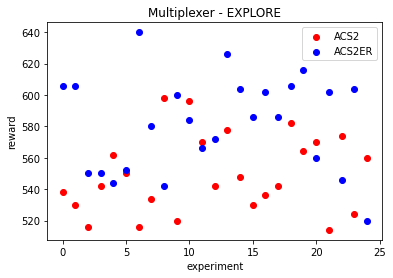

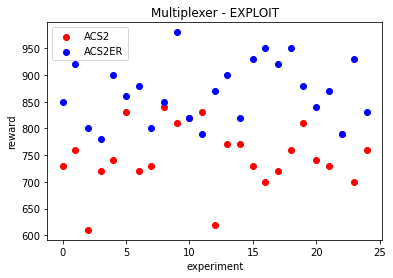

In [14]:
x_axis = range(EXPERIMENTS)

plt.title("Multiplexer - EXPLORE")
plt.scatter(x_axis, acs2_explore_results, c='r', label="ACS2")
plt.scatter(x_axis, acs2er_explore_results, c='b', label="ACS2ER")
plt.legend()
plt.xlabel("experiment")
plt.ylabel("avg. reward")
plt.show()
# plt.savefig(f"EXPLORE_{RUN}.png")
plt.close()

plt.title("Multiplexer - EXPLOIT")
plt.scatter(x_axis, acs2_exploit_results, c='r', label="ACS2")
plt.scatter(x_axis, acs2er_exploit_results, c='b', label="ACS2ER")
plt.xlabel("experiment")
plt.ylabel("avg. reward")
plt.legend()
plt.show()
# plt.savefig(f"EXPLOIT_{RUN}.png")